In [1]:
# from xautodl.datasets.get_dataset_with_transform import get_datasets

# get_datasets("synthetic-cifar10", "./", 0)

In [2]:
%pip uninstall -y nats-bench
# we install our modified version to accommodate the new datasets.
%pip install ./NATS-Bench/
# also need to install the xautodl package.
%pip install ./XAutoDL/ 
from nats_bench import *

Found existing installation: nats_bench 1.8
Uninstalling nats_bench-1.8:
  Successfully uninstalled nats_bench-1.8
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Processing c:\users\gtsak\onedrive - newcastle university\year 3\csc3094 - dissertation\code\nas\nats-bench
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for nats_bench: filename=nats_bench-1.8-py3-none-any.whl size=32752 sha256=687d6e737882304a94d28a720b60f90e6b049f93943437395e8dfb109c6521be
  Stored in directory: c:\users\gtsak\appdata\local\pip\cache\wheels\70\67\ba\a19fc2036bc83439fc7ee91cdf6dafd9bc3db47762824c474f
Successfully built


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Processing c:\users\gtsak\onedrive - newcastle university\year 3\csc3094 - dissertation\code\nas\xautodl
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for xautodl: filename=xautodl-1.0.0-py3-none-any.whl size=228263 sha256=b6c8b46e22b4b37f6ee03fcb0c80b11bf4d678de1bce8fa586551c3bb6db3dac
  Stored in directory: C:\Users\gtsak\AppData\Local\Temp\pip-ephem-wheel-cache-7z4zuxzj\wheels\07\2d\b1\39d2abf27709644db7827eb5ec57a3c56b69ce96ea4c8f83dd
Successfully built xautodl
  Attempting uninstall: xautodl
    Found existing installation: xautodl 1.0.0
    Uninstalling xautodl-1.0.0:
      Successfully uninstalled xautodl-1.


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Create the API for the topology search space
# ORIGINAL
api_og = create(None, 'tss', fast_mode=True, verbose=False)
print(api_og)
print('-'*50)

# SYNTHETIC CIFAR10
api_new = create("./XAutoDL/output/NATS-Bench-topology-synthetic/NATS-tss-v1_0-2c4c1-simple",
             "tss",
             fast_mode=True,
             verbose=False)
print(api_new)

[2025-05-13 22:46:54] Try to use the default NATS-Bench (topology) path from fast_mode=True and path=None.
NATStopology(0/15625 architectures, fast_mode=True, file=None)
--------------------------------------------------
NATStopology(0/15625 architectures, fast_mode=True, file=NATS-tss-v1_0-2c4c1-simple)


In [4]:
# Original TinyImagenet10
tiny_api = create("./XAutoDL/output/NATS-Bench-topology-tiny10/NATS-tss-v1_0-3f35c-simple",
             "tss",
             fast_mode=True,
             verbose=False)
print(tiny_api)
print('-'*50)

# Synthetic TinyImagenet10
synth_tiny_api = create("./XAutoDL/output/NATS-Bench-topology-synthetic-Tiny10/NATS-tss-v1_0-dfe2d-simple",
             "tss",
             fast_mode=True,
             verbose=False)
print(synth_tiny_api)

NATStopology(0/15625 architectures, fast_mode=True, file=NATS-tss-v1_0-3f35c-simple)
--------------------------------------------------
NATStopology(0/15625 architectures, fast_mode=True, file=NATS-tss-v1_0-dfe2d-simple)


In [5]:
# architecture_str = api_new.arch(13701)
# print(architecture_str)
# print()


info_og = api_og.get_more_info(13711, 'cifar10', hp='200', is_random=False)
info_new = api_new.get_more_info(13711, 'synthetic-cifar10', hp='200', is_random=False) 
print(info_og)
print(info_new)

print('-'*50)

info_tiny = tiny_api.get_more_info(13711, 'Tiny10', hp='200', is_random=False)
info_synth_tiny = synth_tiny_api.get_more_info(13711, 'synthetic-Tiny10', hp='200', is_random=False)
print(info_tiny)
print(info_synth_tiny)

{'train-loss': 0.14618850772619246, 'train-accuracy': 95.03466666666667, 'train-per-time': 13.116634408632912, 'train-all-time': 2623.3268817265825, 'comment': 'In this dict, train-loss/accuracy/time is the metric on the train+valid sets of CIFAR-10. The test-loss/accuracy/time is the performance of the CIFAR-10 test set after training on the train+valid sets by 200 epochs. The per-time and total-time indicate the per epoch and total time costs, respectively.', 'test-loss': 0.5246458746592203, 'test-accuracy': 85.10666666666667, 'test-per-time': 1.0277362096877325, 'test-all-time': 205.5472419375465}
{'train-loss': 0.002295576083784302, 'train-accuracy': 100.0, 'train-per-time': 0.864486300945282, 'train-all-time': 172.8972601890564, 'valtest-loss': 3.290654374694824, 'valtest-accuracy': 39.61, 'valtest-per-time': 1.5074817848205566, 'valtest-all-time': 301.4963569641113}
--------------------------------------------------
{'train-loss': 0.9038587517738342, 'train-accuracy': 68.95999993

In [6]:
architecture_str = api_new.arch(13711)
print(architecture_str)

cost_info_og = api_og.get_cost_info(13711, 'cifar10', hp='200')
print(cost_info_og)

cost_info_new = api_new.get_cost_info(13711, 'synthetic-cifar10', hp='200')
print(cost_info_new)

print('-'*50)

cost_info_tiny = tiny_api.get_cost_info(13711, 'Tiny10', hp='200')
print(cost_info_tiny)

cost_info_synth_tiny = synth_tiny_api.get_cost_info(13711, 'synthetic-Tiny10', hp='200')
print(cost_info_synth_tiny)

# bigger flops because of the larger input size (64x64x3 vs 32x32x3)

|avg_pool_3x3~0|+|nor_conv_1x1~0|skip_connect~1|+|none~0|none~1|avg_pool_3x3~2|
{'flops': 11.71521, 'params': np.float64(0.101306), 'latency': np.float64(0.013020281206097517), 'T-train@epoch': 13.116634408632912, 'T-train@total': 2623.3268817265825, 'T-ori-test@epoch': 1.0277362096877325, 'T-ori-test@total': 205.5472419375465}
{'flops': 11.71521, 'params': np.float64(0.101306), 'latency': None, 'T-train@epoch': 0.864486300945282, 'T-train@total': 172.8972601890564, 'T-ori-test@epoch': 1.5074817848205566, 'T-ori-test@total': 301.4963569641113}
--------------------------------------------------
{'flops': 46.85889, 'params': np.float64(0.101306), 'latency': None, 'T-train@epoch': 7.902984676361084, 'T-train@total': 1580.5969352722168, 'T-ori-test@epoch': 1.783949030637741, 'T-ori-test@total': 356.7898061275482}
{'flops': 46.85889, 'params': np.float64(0.101306), 'latency': None, 'T-train@epoch': 1.0089733159542085, 'T-train@total': 201.79466319084167, 'T-ori-test@epoch': 1.78052021503448

In [7]:
# Get the architecture index you want to train (example: index 13711)
arch_index = 13711

# Train the architecture
validation_accuracy, latency, time_cost, current_total_time_cost = api_og.simulate_train_eval(arch_index, dataset='cifar10', hp='200')
print("CIFAR10 STATS")
print(f"Validation accuracy: {round(validation_accuracy, 2)}%")
print(f"Time cost: {time_cost} seconds")

validation_accuracy, latency, time_cost, current_total_time_cost = api_new.simulate_train_eval(arch_index, dataset='synthetic-cifar10', hp='200')
print()
print("SYNTHETIC CIFAR10 STATS")
print(f"Validation accuracy: {round(validation_accuracy, 2)}%")
print(f"Time cost: {time_cost} seconds")

print('-'*50)

validation_accuracy, latency, time_cost, current_total_time_cost = tiny_api.simulate_train_eval(arch_index, dataset='Tiny10', hp='200')
print("TINY10 STATS")
print(f"Validation accuracy: {round(validation_accuracy, 2)}%")
print(f"Time cost: {time_cost} seconds")

validation_accuracy, latency, time_cost, current_total_time_cost = synth_tiny_api.simulate_train_eval(arch_index, dataset='synthetic-Tiny10', hp='200')
print()
print("SYNTHETIC TINY10 STATS")
print(f"Validation accuracy: {round(validation_accuracy, 2)}%")
print(f"Time cost: {time_cost} seconds")


CIFAR10 STATS
Validation accuracy: 78.63%
Time cost: 1314.2327813875106 seconds

SYNTHETIC CIFAR10 STATS
Validation accuracy: 39.61%
Time cost: 174.40474197387695 seconds
--------------------------------------------------
TINY10 STATS
Validation accuracy: 61.2%
Time cost: 1582.3808843028546 seconds

SYNTHETIC TINY10 STATS
Validation accuracy: 37.2%
Time cost: 203.57518340587615 seconds


In [8]:
# Search the api to find the best performing architecture trained on CIFAR-10 with 200 epochs
def search_best_architecture(api, dataset, hp, start=0, end=None):
    end = end or len(api)

    best_index = None
    best_accuracy = 0

    if hp not in ['12', '200', '90']:
        raise ValueError("hp must be one of '12', '200', or '90'")

    for i in range(start, end):
        info = api.get_more_info(i, dataset, hp=hp, is_random=False)
        if "test-accuracy" not in info:
            metric = info['valtest-accuracy']
        else:
            metric = info['test-accuracy']
        if metric > best_accuracy:
            best_accuracy = metric
            best_index = i

    print(f"Best index for {dataset}: {best_index}, Test accuracy: {best_accuracy}%")

    return best_index, best_accuracy

best_index_og, best_accuracy_og = search_best_architecture(api_og, 'cifar10', hp='200', start=13700, end=13800)
best_index_new, best_accuracy_new = search_best_architecture(api_new, 'synthetic-cifar10', hp='200', start=13700, end=13800)
print('-'*50)
best_index_tiny, best_accuracy_tiny = search_best_architecture(tiny_api, 'Tiny10', hp='200', start=13700, end=13800)
best_index_synth_tiny, best_accuracy_synth_tiny = search_best_architecture(synth_tiny_api, 'synthetic-Tiny10', hp='200', start=13700, end=13800)

Best index for cifar10: 13714, Test accuracy: 94.37333333333333%
Best index for synthetic-cifar10: 13714, Test accuracy: 52.51%
--------------------------------------------------
Best index for Tiny10: 13778, Test accuracy: 72.99999822998046%
Best index for synthetic-Tiny10: 13716, Test accuracy: 43.19999908447266%


In [9]:
def get_top_10_arch_accuracy_tss(api, dataset, hp, verbose=True, is_random=False):
    """
    Get the top 10 architectures trained on the given dataset and number of epochs.
    
    Args:
    api: the API object
    dataset: the dataset the models were trained on
    hp: the number of epochs the models were trained on (12, 200, or 90)
    verbose: whether to print the top 10 architectures
    is_random: whether to randomly sample architectures

    Returns:
    top_10_arch: a dictionary with the index of the architecture as the key and the test accuracy as the value, sorted by test accuracy in descending order (highest first)
    """

    if hp not in ['12', '200', '90']:
        raise ValueError("hp must be one of '12', '200', or '90'")
    
    top_10_arch = {i: 0 for i in range(10)}
    for i in range(len(api)):
        info = api.get_more_info(i, dataset, hp=hp, is_random=is_random)
        if 'test-accuracy' not in info:
            metric = info['valtest-accuracy']
        else:
            metric = info['test-accuracy']
        if metric > min(top_10_arch.values()):
            min_key = min(top_10_arch, key=top_10_arch.get)
            top_10_arch.pop(min_key)
            top_10_arch[i] = metric

    # sort the dictionary
    top_10_arch = dict(reversed(sorted(top_10_arch.items(), key=lambda item: item[1])))
    
    if verbose:
        print("top 10 architectures:")
        pos = 1
        for key, value in top_10_arch.items():
            print(f"Position {pos}: Index {key}, Test accuracy: {round(value, 3)}")
            pos += 1

    return top_10_arch

def get_top_10_arch_accuracy_range_tss(api, dataset, hp, verbose=True, is_random=False, start=0, end=None):
    """
    Get the top 10 architectures trained on the given dataset and number of epochs within a range of indices.
    
    Args:
    api: the API object
    dataset: the dataset the models were trained on
    hp: the number of epochs the models were trained on (12, 200, or 90)
    verbose: whether to print the top 10 architectures
    is_random: whether to randomly sample architectures
    start: the starting index to search
    end: the ending index to search
    """
    end = end or len(api)  # if end is None, set it to the length of the api
    
    if hp not in ['12', '200', '90']:
        raise ValueError("hp must be one of '12', '200', or '90'")
    
    if start < 0 or start >= len(api) or end < start or end > len(api):
        raise ValueError("start and end must be valid indices in the search space")
        
    
    top_10_arch = {i: 0 for i in range(10)}
    for i in range(start, end):
        info = api.get_more_info(i, dataset, hp=hp, is_random=is_random)
        if 'test-accuracy' not in info:
            metric = info['valtest-accuracy']
        else:
            metric = info['test-accuracy']
        if metric > min(top_10_arch.values()):
            min_key = min(top_10_arch, key=top_10_arch.get)
            top_10_arch.pop(min_key)
            top_10_arch[i] = metric

    # sort the dictionary
    top_10_arch = dict(reversed(sorted(top_10_arch.items(), key=lambda item: item[1])))

    if verbose:
        print("top 10 architectures:")
        pos = 1
        for key, value in top_10_arch.items():
            print(f"Position {pos}: Index {key}, Test accuracy: {round(value, 3)}")
            pos += 1

    return top_10_arch

print("CIFAR10")
top_10_arch = get_top_10_arch_accuracy_range_tss(api_og, 'cifar10', '200', start=13700, end=13800)
print()
print("SYNTHETIC CIFAR10")
top_10_arch_new = get_top_10_arch_accuracy_range_tss(api_new, 'synthetic-cifar10', '200', start=13700, end=13800)

print('-'*50)
print("TINY10")
top_10_arch_tiny = get_top_10_arch_accuracy_range_tss(tiny_api, 'Tiny10', '200', start=13700, end=13800)
print()
print("SYNTHETIC TINY10")
top_10_arch_synth_tiny = get_top_10_arch_accuracy_range_tss(synth_tiny_api, 'synthetic-Tiny10', '200', start=13700, end=13800)


CIFAR10
top 10 architectures:
Position 1: Index 13714, Test accuracy: 94.373
Position 2: Index 13778, Test accuracy: 93.9
Position 3: Index 13755, Test accuracy: 93.567
Position 4: Index 13741, Test accuracy: 93.463
Position 5: Index 13761, Test accuracy: 93.283
Position 6: Index 13700, Test accuracy: 93.253
Position 7: Index 13775, Test accuracy: 93.193
Position 8: Index 13750, Test accuracy: 93.023
Position 9: Index 13743, Test accuracy: 93.003
Position 10: Index 13717, Test accuracy: 92.867

SYNTHETIC CIFAR10
top 10 architectures:
Position 1: Index 13714, Test accuracy: 52.51
Position 2: Index 13741, Test accuracy: 51.1
Position 3: Index 13755, Test accuracy: 50.41
Position 4: Index 13778, Test accuracy: 50.03
Position 5: Index 13770, Test accuracy: 48.5
Position 6: Index 13751, Test accuracy: 48.5
Position 7: Index 13743, Test accuracy: 48.28
Position 8: Index 13718, Test accuracy: 48.11
Position 9: Index 13702, Test accuracy: 47.63
Position 10: Index 13799, Test accuracy: 47.61
--

# YAY!!!

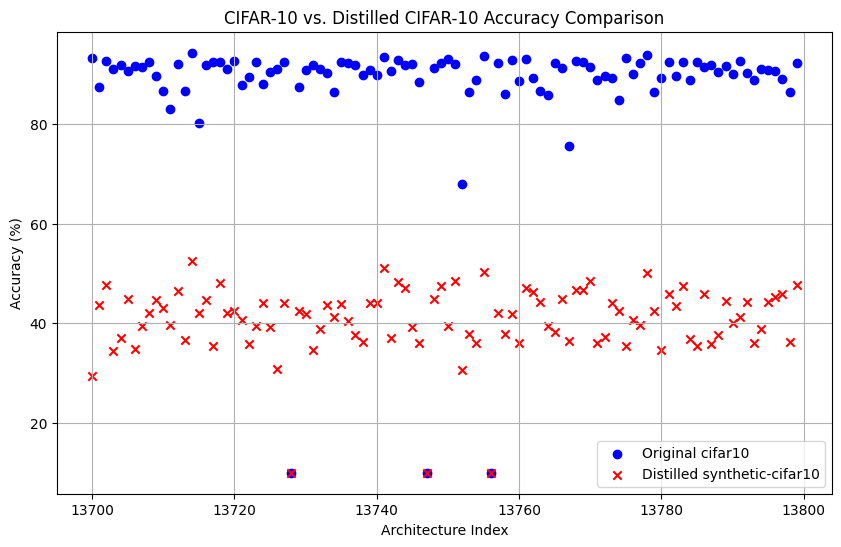

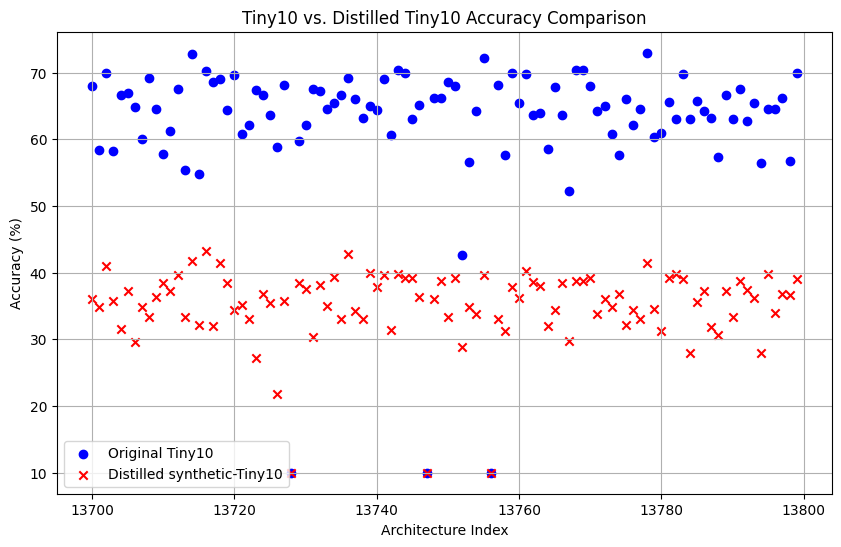

In [10]:
import matplotlib.pyplot as plt

def plot_accuracy_comparison(api_og, api_new, dataset_og, dataset_new, hp, start, end, title):
    """
    Plot accuracies of original vs distilled dataset for architectures in a given range.

    Args:
    api_og: API object for original dataset
    api_new: API object for new (distilled) dataset
    dataset_og: Name of the original dataset
    dataset_new: Name of the synthetic/distilled dataset
    hp: Number of training epochs ('12', '200', '90')
    start: Starting index
    end: Ending index
    title: Title of the plot
    """
    indices = list(range(start, end))
    accuracies_og = []
    accuracies_new = []
    
    for i in indices:
        info_og = api_og.get_more_info(i, dataset_og, hp=hp)
        info_new = api_new.get_more_info(i, dataset_new, hp=hp)
        
        metric_og = info_og.get('test-accuracy', info_og.get('valtest-accuracy'))
        metric_new = info_new.get('test-accuracy', info_new.get('valtest-accuracy'))
        
        accuracies_og.append(metric_og)
        accuracies_new.append(metric_new)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(indices, accuracies_og, label=f'Original {dataset_og}', color='blue', marker='o')
    plt.scatter(indices, accuracies_new, label=f'Distilled {dataset_new}', color='red', marker='x')
    plt.xlabel('Architecture Index')
    plt.ylabel('Accuracy (%)')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot accuracies for CIFAR10 vs Synthetic CIFAR10
plot_accuracy_comparison(api_og, api_new, 'cifar10', 'synthetic-cifar10', '200', 13700, 13800, 'CIFAR-10 vs. Distilled CIFAR-10 Accuracy Comparison')

# Plot accuracies for Tiny10 vs Synthetic Tiny10
plot_accuracy_comparison(tiny_api, synth_tiny_api, 'Tiny10', 'synthetic-Tiny10', '200', 13700, 13800, 'Tiny10 vs. Distilled Tiny10 Accuracy Comparison')

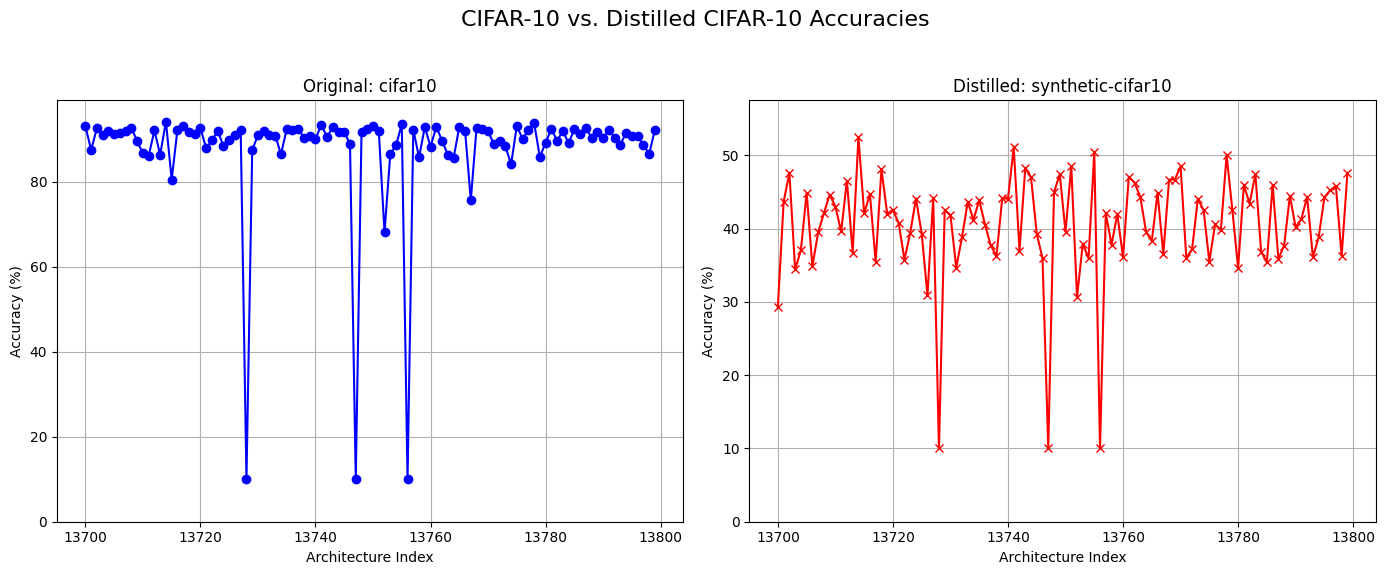

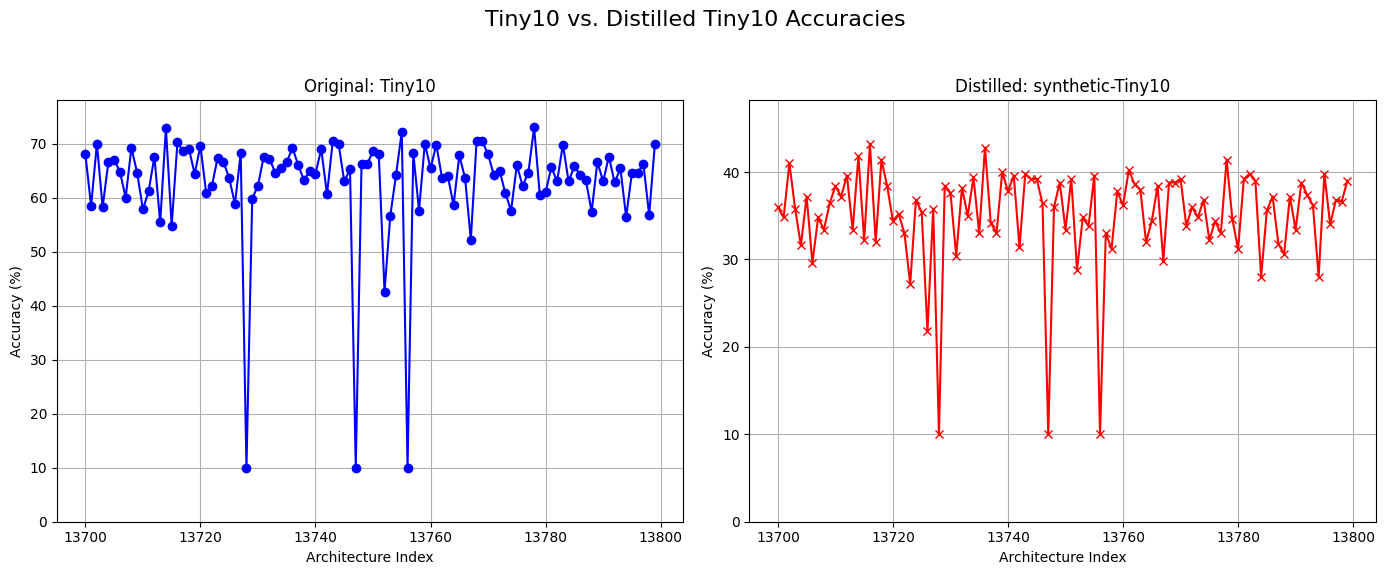

In [11]:
import matplotlib.pyplot as plt

def plot_accuracy_comparison_side_by_side(api_og, api_new, dataset_og, dataset_new, hp, start, end, title):
    """
    Plot accuracies of original vs distilled dataset side by side with independent scaling.
    
    Args:
    api_og: API object for original dataset
    api_new: API object for new (distilled) dataset
    dataset_og: Name of the original dataset
    dataset_new: Name of the synthetic/distilled dataset
    hp: Number of training epochs ('12', '200', '90')
    start: Starting index
    end: Ending index
    title: Title for the entire figure
    """
    indices = list(range(start, end))
    accuracies_og = []
    accuracies_new = []
    
    for i in indices:
        info_og = api_og.get_more_info(i, dataset_og, hp=hp)
        info_new = api_new.get_more_info(i, dataset_new, hp=hp)
        
        metric_og = info_og.get('test-accuracy', info_og.get('valtest-accuracy'))
        metric_new = info_new.get('test-accuracy', info_new.get('valtest-accuracy'))
        
        accuracies_og.append(metric_og)
        accuracies_new.append(metric_new)
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True)
    
    # Plot original dataset
    axes[0].plot(indices, accuracies_og, marker='o', color='blue')
    axes[0].set_title(f'Original: {dataset_og}')
    axes[0].set_xlabel('Architecture Index')
    axes[0].set_ylabel('Accuracy (%)')
    axes[0].set_ylim(0, max(accuracies_og) + 5)  # Add a bit of padding
    axes[0].grid(True)
    
    # Plot distilled/synthetic dataset
    axes[1].plot(indices, accuracies_new, marker='x', color='red')
    axes[1].set_title(f'Distilled: {dataset_new}')
    axes[1].set_xlabel('Architecture Index')
    axes[1].set_ylabel('Accuracy (%)')
    axes[1].set_ylim(0, max(accuracies_new) + 5)  # Add a bit of padding
    axes[1].grid(True)
    
    fig.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Leave space for the suptitle
    plt.show()


plot_accuracy_comparison_side_by_side(api_og, api_new, 'cifar10', 'synthetic-cifar10', '200', 13700, 13800, 'CIFAR-10 vs. Distilled CIFAR-10 Accuracies')

plot_accuracy_comparison_side_by_side(tiny_api, synth_tiny_api, 'Tiny10', 'synthetic-Tiny10', '200', 13700, 13800, 'Tiny10 vs. Distilled Tiny10 Accuracies')
